In [43]:
%load_ext autoreload
%autoreload 2

Import


In [44]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import utils

### Exemple d'utilisation

In [45]:

# Configurer les options d'affichage de pandas pour une meilleure lisibilité
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 2. Charger les fichiers CSV
team_stats = pd.read_csv('../data/teams_stats/NBA-Team-Regular-Season-Stats-2001-02.csv')
team_stats_differential = pd.read_csv('../data/teams_stats_differential/NBA-Team-Regular-Season-Stats-2001-02.csv')
team_stats_opponent = pd.read_csv('../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-2001-02.csv')

# 3. Inspecter les premières lignes des données
print("Premières lignes de team_stats:")
print(team_stats.head())

print("\nPremières lignes de team_stats_differential:")
print(team_stats_differential.head())

print("\nPremières lignes de team_stats_regular_season:")
print(team_stats_opponent.head())



Premières lignes de team_stats:
   Rank               Team Name  GP    PTS   FGM   FGA   FG%  3PM   3PA   3P%  \
0     1        Dallas Mavericks  82  105.2  39.0  84.5  46.2  7.6  20.1  37.8   
1     2        Sacramento Kings  82  104.6  39.8  85.4  46.7  5.2  14.1  36.7   
2     3      Los Angeles Lakers  82  101.3  38.4  83.4  46.1  6.2  17.5  35.4   
3     4           Orlando Magic  82  100.5  37.6  84.1  44.8  7.6  20.2  37.3   
4     5  Minnesota Timberwolves  82   99.3  38.7  84.0  46.1  4.8  12.8  37.8   

    FTM   FTA   FT%    OR    DR   REB   AST  STL  BLK    TO    PF  \
0  19.6  24.3  80.6  11.2  31.3  42.5  22.1  7.1  4.8  12.1  22.5   
1  19.7  26.3  75.1  12.4  33.0  45.3  23.9  9.0  4.6  13.8  19.0   
2  18.2  26.1  69.9  12.5  31.8  44.3  23.0  7.6  5.8  12.7  22.2   
3  17.6  23.4  75.4  11.5  29.8  41.2  22.0  8.1  4.7  13.6  20.7   
4  17.1  21.4  79.8  12.9  31.2  44.2  24.3  6.4  5.2  13.4  21.2   

                                   Title  
0  NBA Team Regular Sea

### Verification  des données : valeures null /  doublons 


In [46]:
# Dictionnaire pour stocker les chemins des fichiers
file_paths = {
    "team_stats": "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv",
    "team_stats_differential": "../data/teams_stats_differential/NBA-Team-Regular-Season-Stats-{}.csv",
    "team_stats_opponent": "../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-{}.csv"
}

# Colonnes à vérifier pour les valeurs numériques
columns_to_check = ['GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']


# Vérifier les fichiers team_stats
print("Checking team_stats files")
utils.check_data_problems(file_paths["team_stats"],columns_to_check)

# Vérifier les fichiers team_stats_differential
print("\nChecking team_stats_differential files")
utils.check_data_problems(file_paths["team_stats_differential"],columns_to_check)

# Vérifier les fichiers team_stats_opponent
print("\nChecking team_stats_opponent files")
utils.check_data_problems(file_paths["team_stats_opponent"],columns_to_check)


Checking team_stats files

Checking team_stats_differential files

Checking team_stats_opponent files


### Team  stats

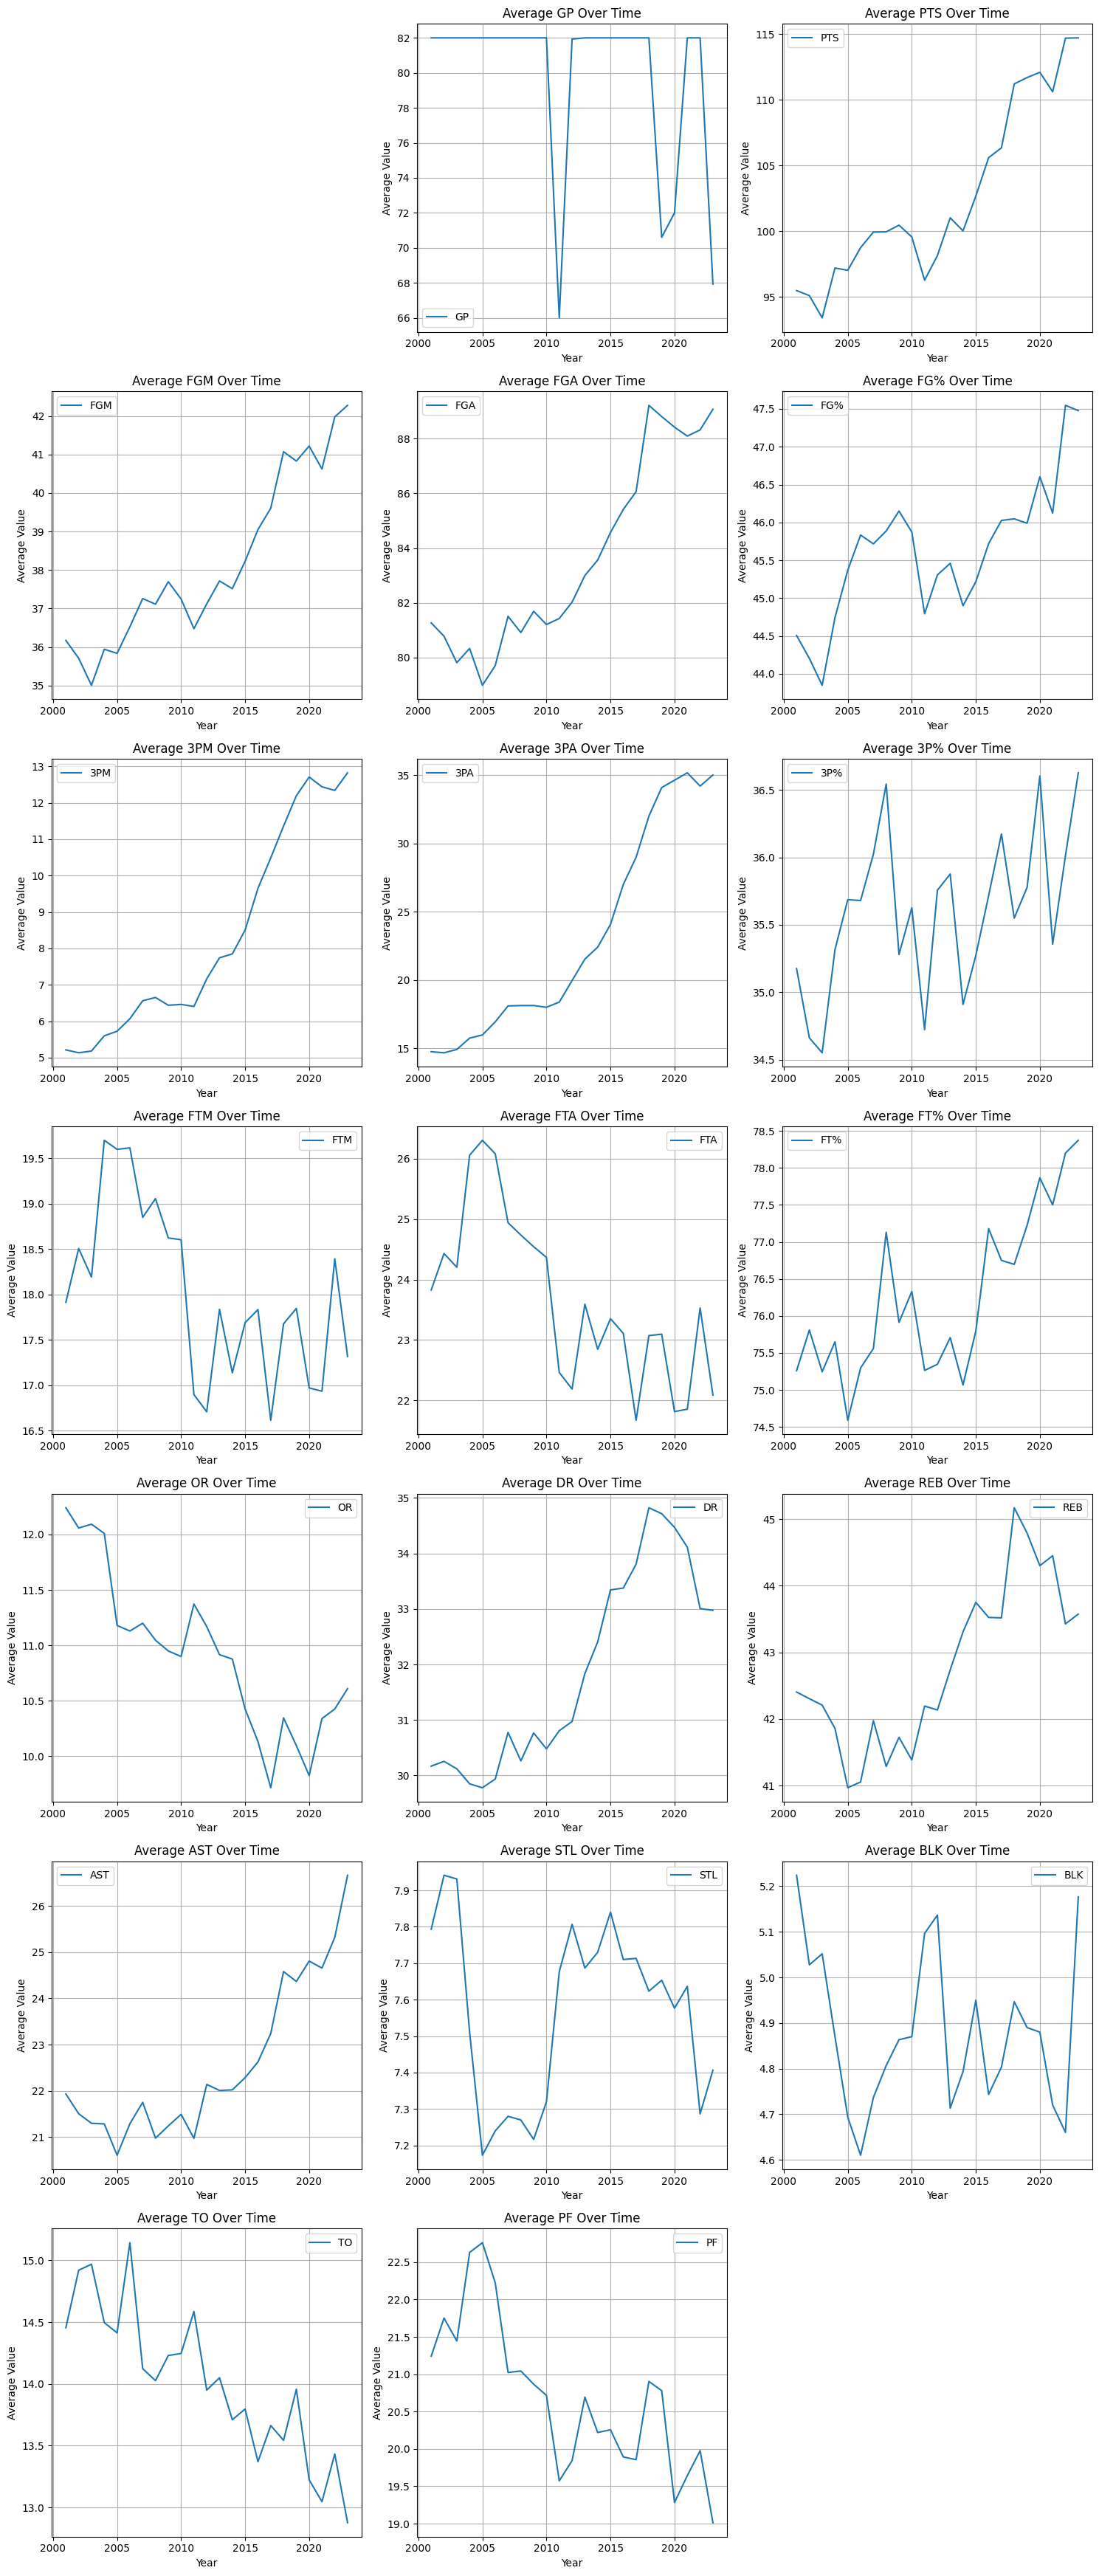

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer les options d'affichage de pandas pour une meilleure lisibilité
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv"

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Charger les données team_stats
team_stats = utils.load_all_data_teams(team_stats_path)
team_stats = utils.filter_selected_columns(team_stats, selected_columns)
team_stats_desc = utils.descriptive_stats(team_stats)

# Visualiser les colonnes sélectionnées pour team_stats
utils.plot_all_variables(team_stats_desc, selected_columns, 'mean', 'Average Value', 'Average')


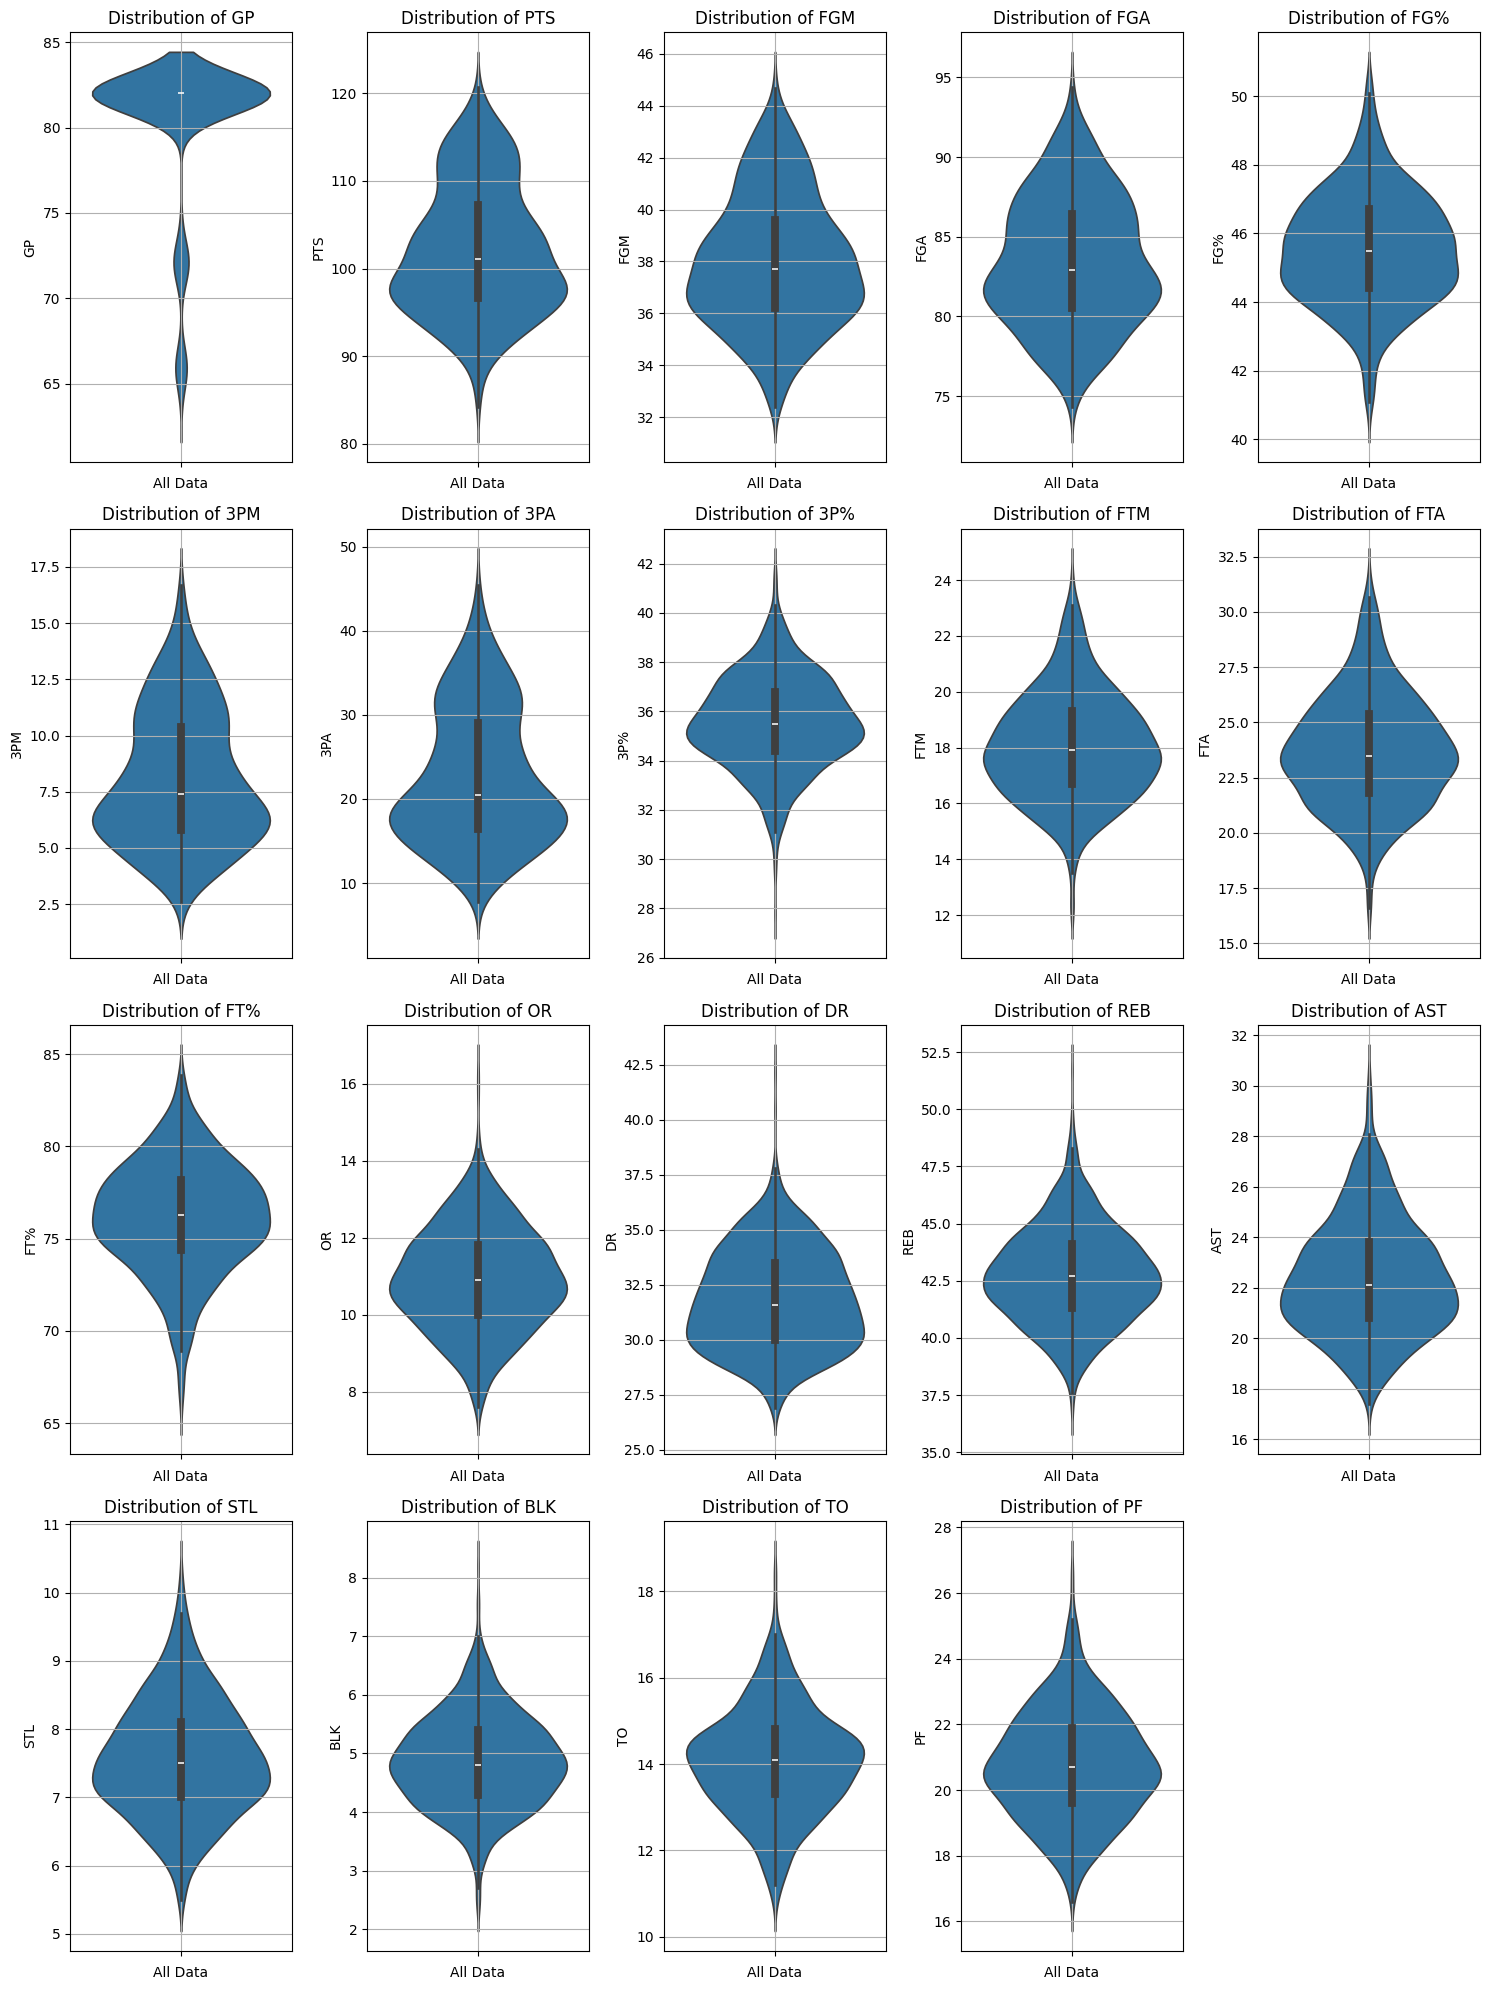

In [51]:
# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv"

# Charger les données
df = utils.load_all_data_teams(team_stats_path)

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Filtrer les colonnes sélectionnées
df_filtered = utils.filter_selected_columns(df, selected_columns)

# Générer des violin plots pour les variables sélectionnées
utils.plot_violin_plots(df_filtered, selected_columns[1:])

###  Correlation pour les statistiques d'équipe

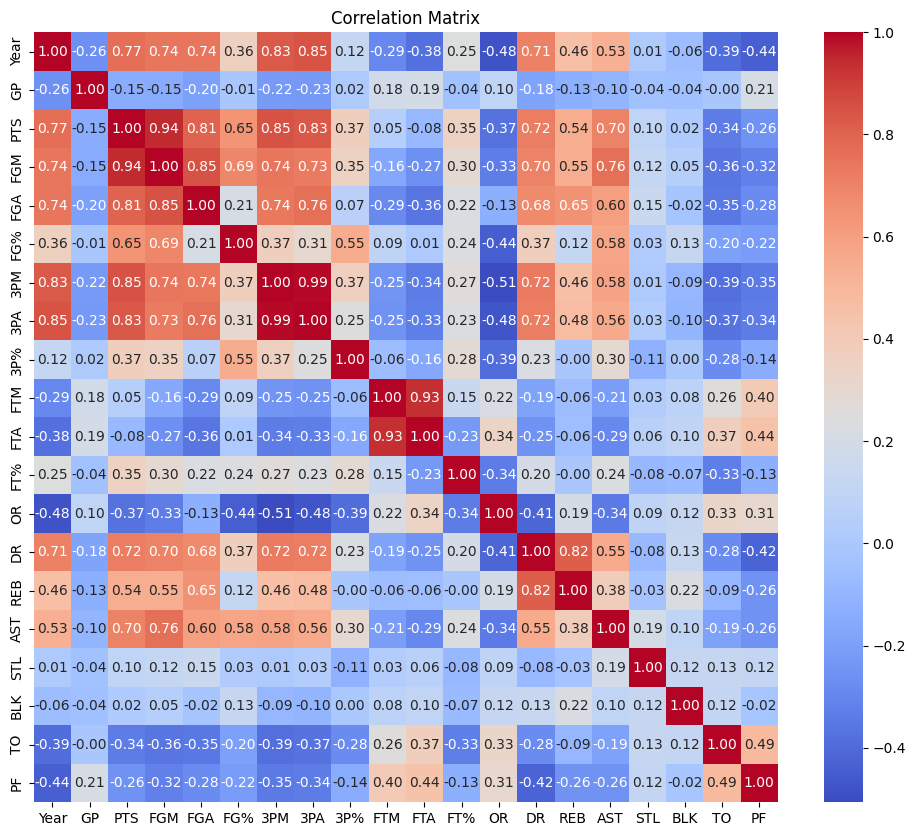

In [58]:

# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv"

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Charger les données team_stats
team_stats = utils.load_all_data_teams(team_stats_path)
team_stats = utils.filter_selected_columns(team_stats, selected_columns)
team_stats_desc = utils.descriptive_stats(team_stats)

# Visualiser les distributions et les relations entre les variables sélectionnées
#plot_distributions_and_relations(team_stats, selected_columns)

# Analyser les corrélations entre les variables sélectionnées
utils.analyze_correlations(team_stats, selected_columns)

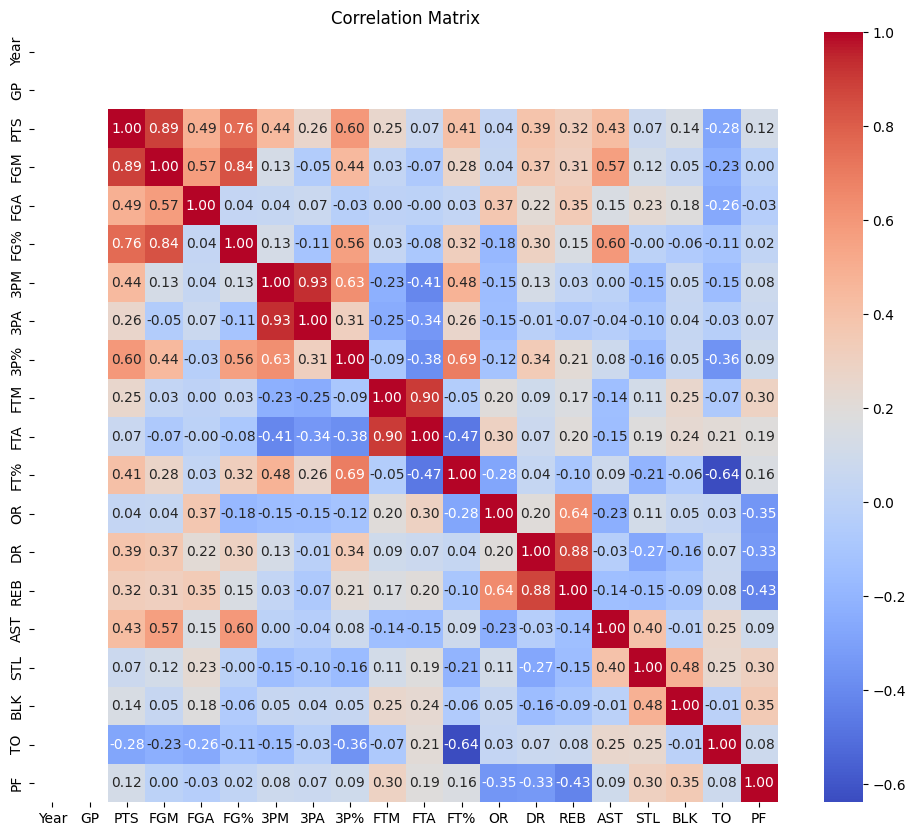

In [60]:
# Analyser les corrélations entre les variables sélectionnées pour une seule année
utils.analyze_correlations(team_stats[team_stats['Year'] == 2020], selected_columns)

### team  stats diffenretial

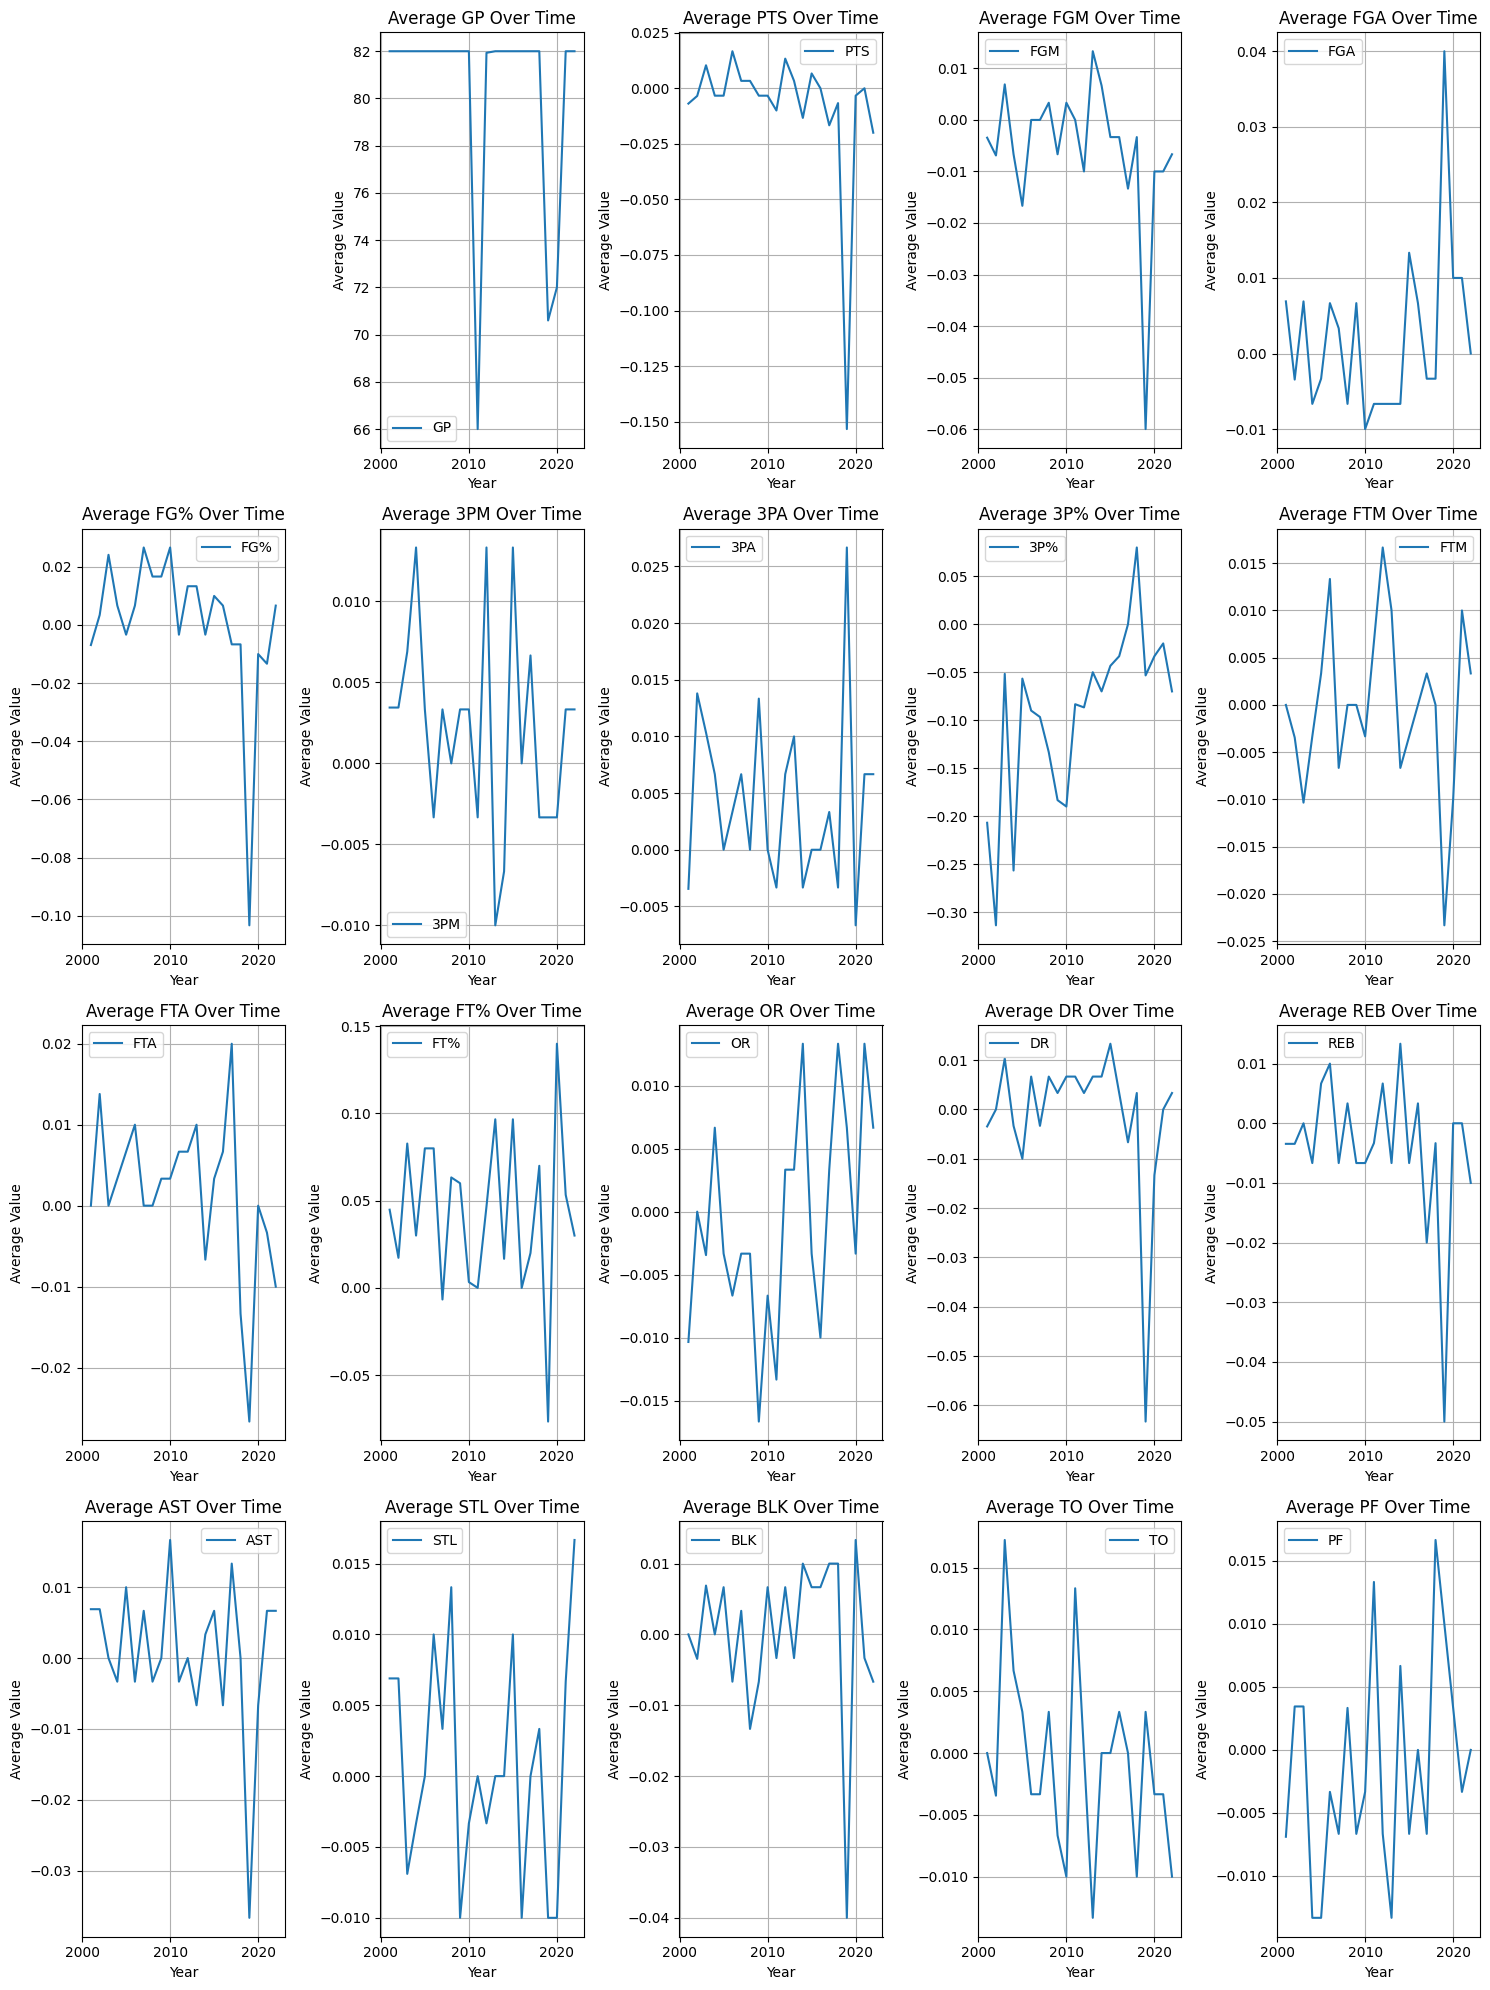

In [50]:
# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats_differential/NBA-Team-Regular-Season-Stats-{}.csv"

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Charger les données team_stats
team_stats = utils.load_all_data_teams(team_stats_path)
team_stats = utils.filter_selected_columns(team_stats, selected_columns)
team_stats_desc = utils.descriptive_stats(team_stats)

# Visualiser les colonnes sélectionnées pour team_stats
utils.plot_all_variables(team_stats_desc, selected_columns, 'mean', 'Average Value', 'Average')

## Données pour teams_stats_opponent 

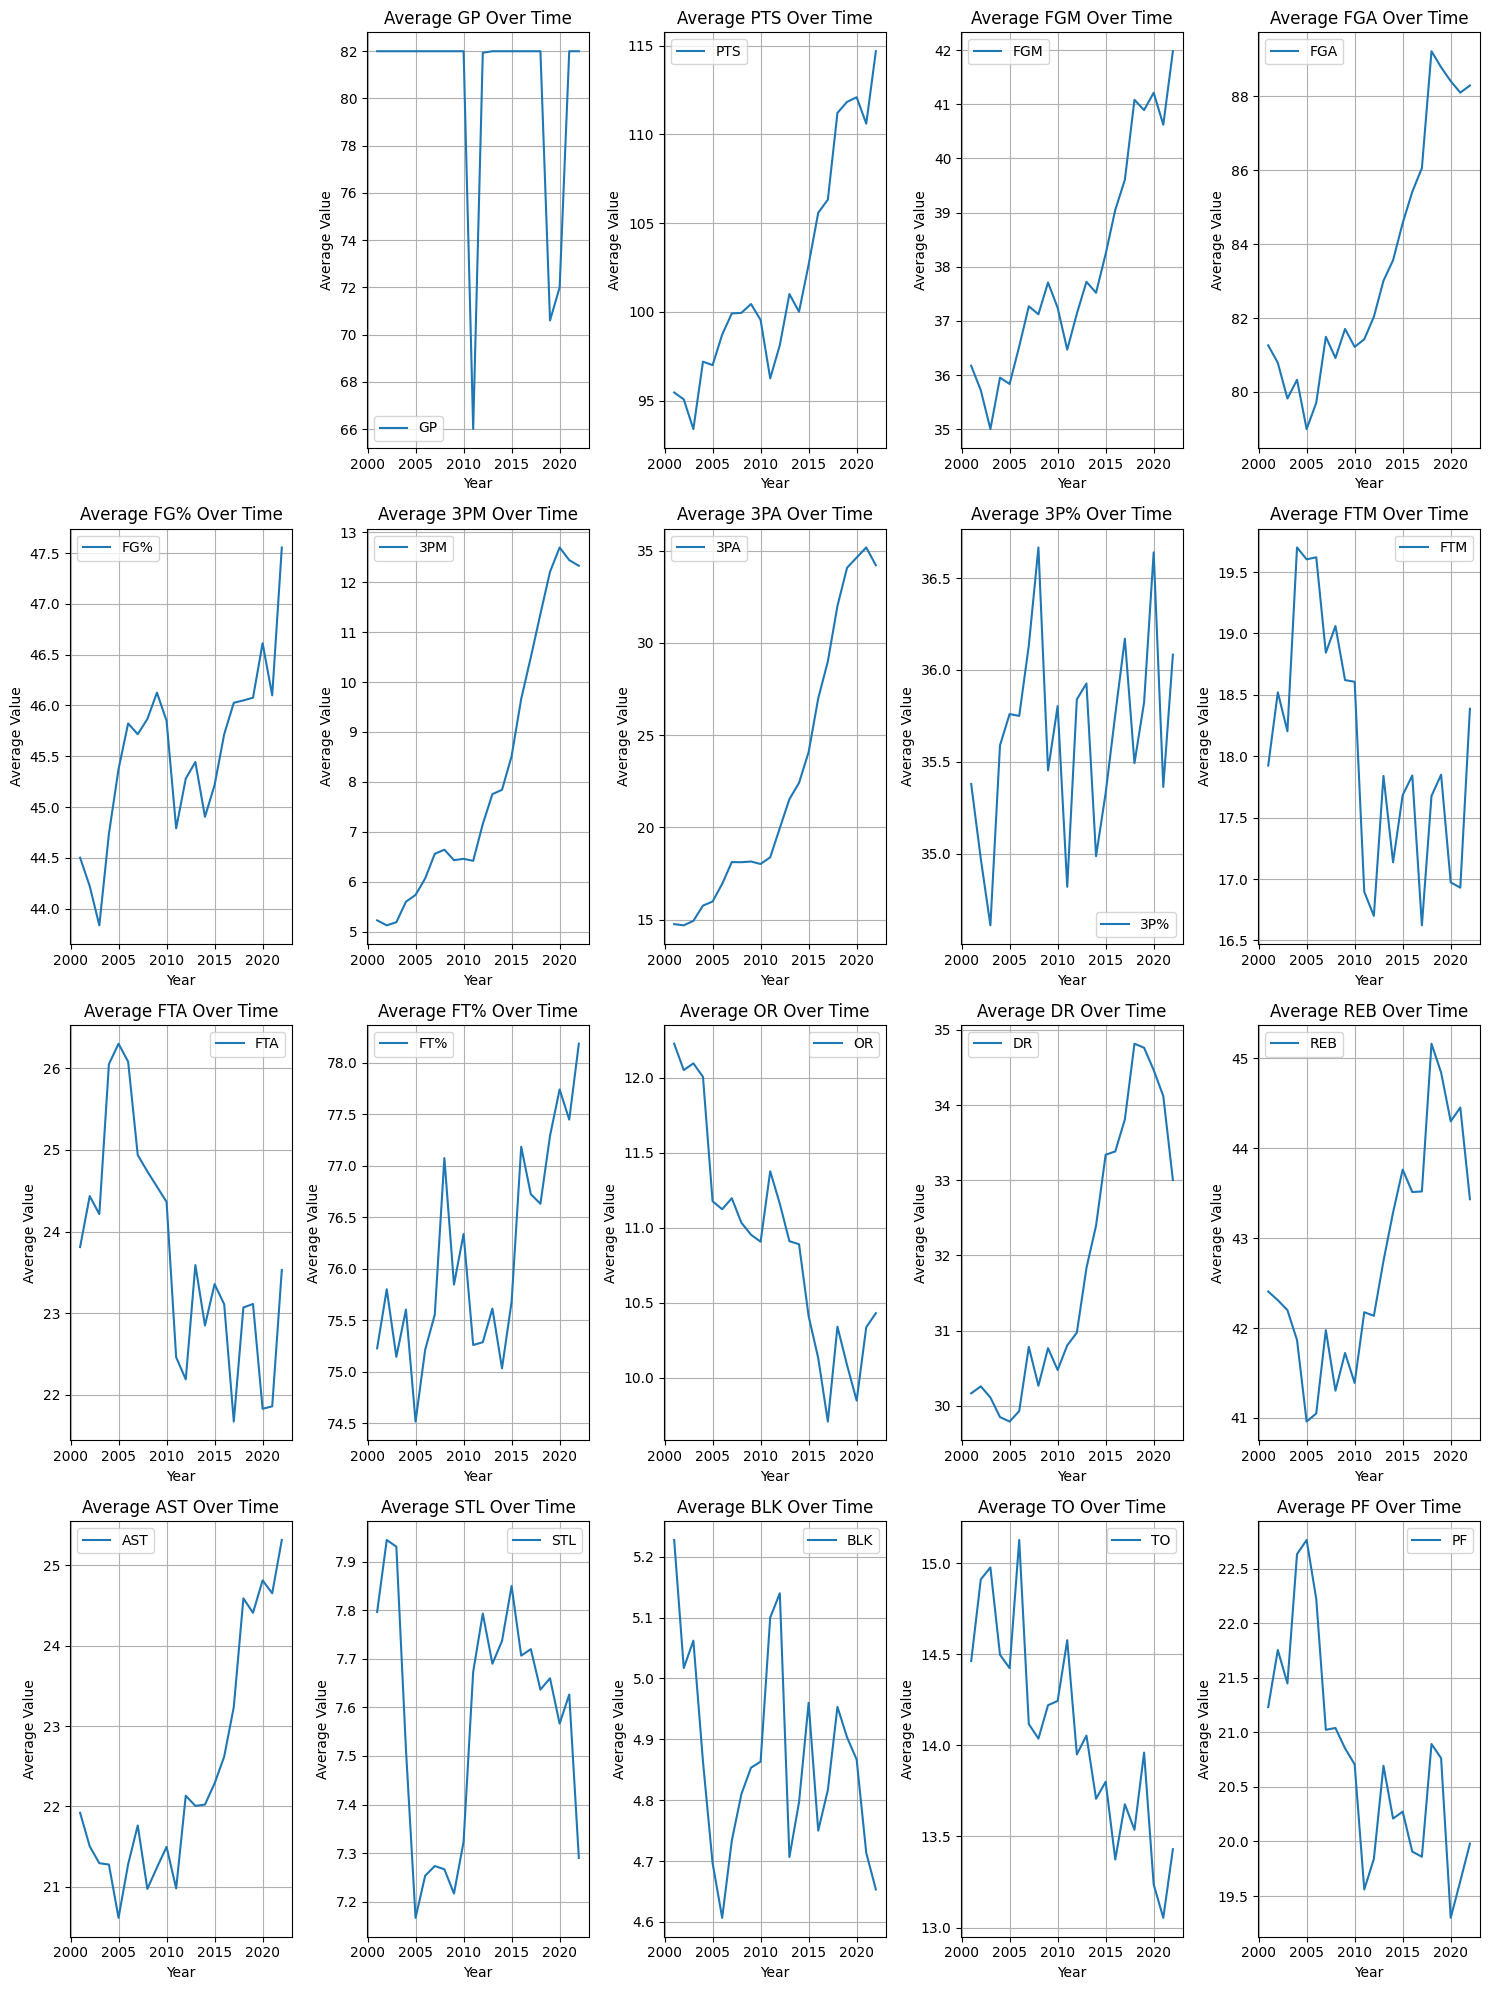

In [49]:
# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-{}.csv"

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Charger les données team_stats
team_stats = utils.load_all_data_teams(team_stats_path)
team_stats = utils.filter_selected_columns(team_stats, selected_columns)
team_stats_desc = utils.descriptive_stats(team_stats)

# Visualiser les colonnes sélectionnées pour team_stats
utils.plot_all_variables(team_stats_desc, selected_columns, 'mean', 'Average Value', 'Average')

## Distribution adverse des équipes :

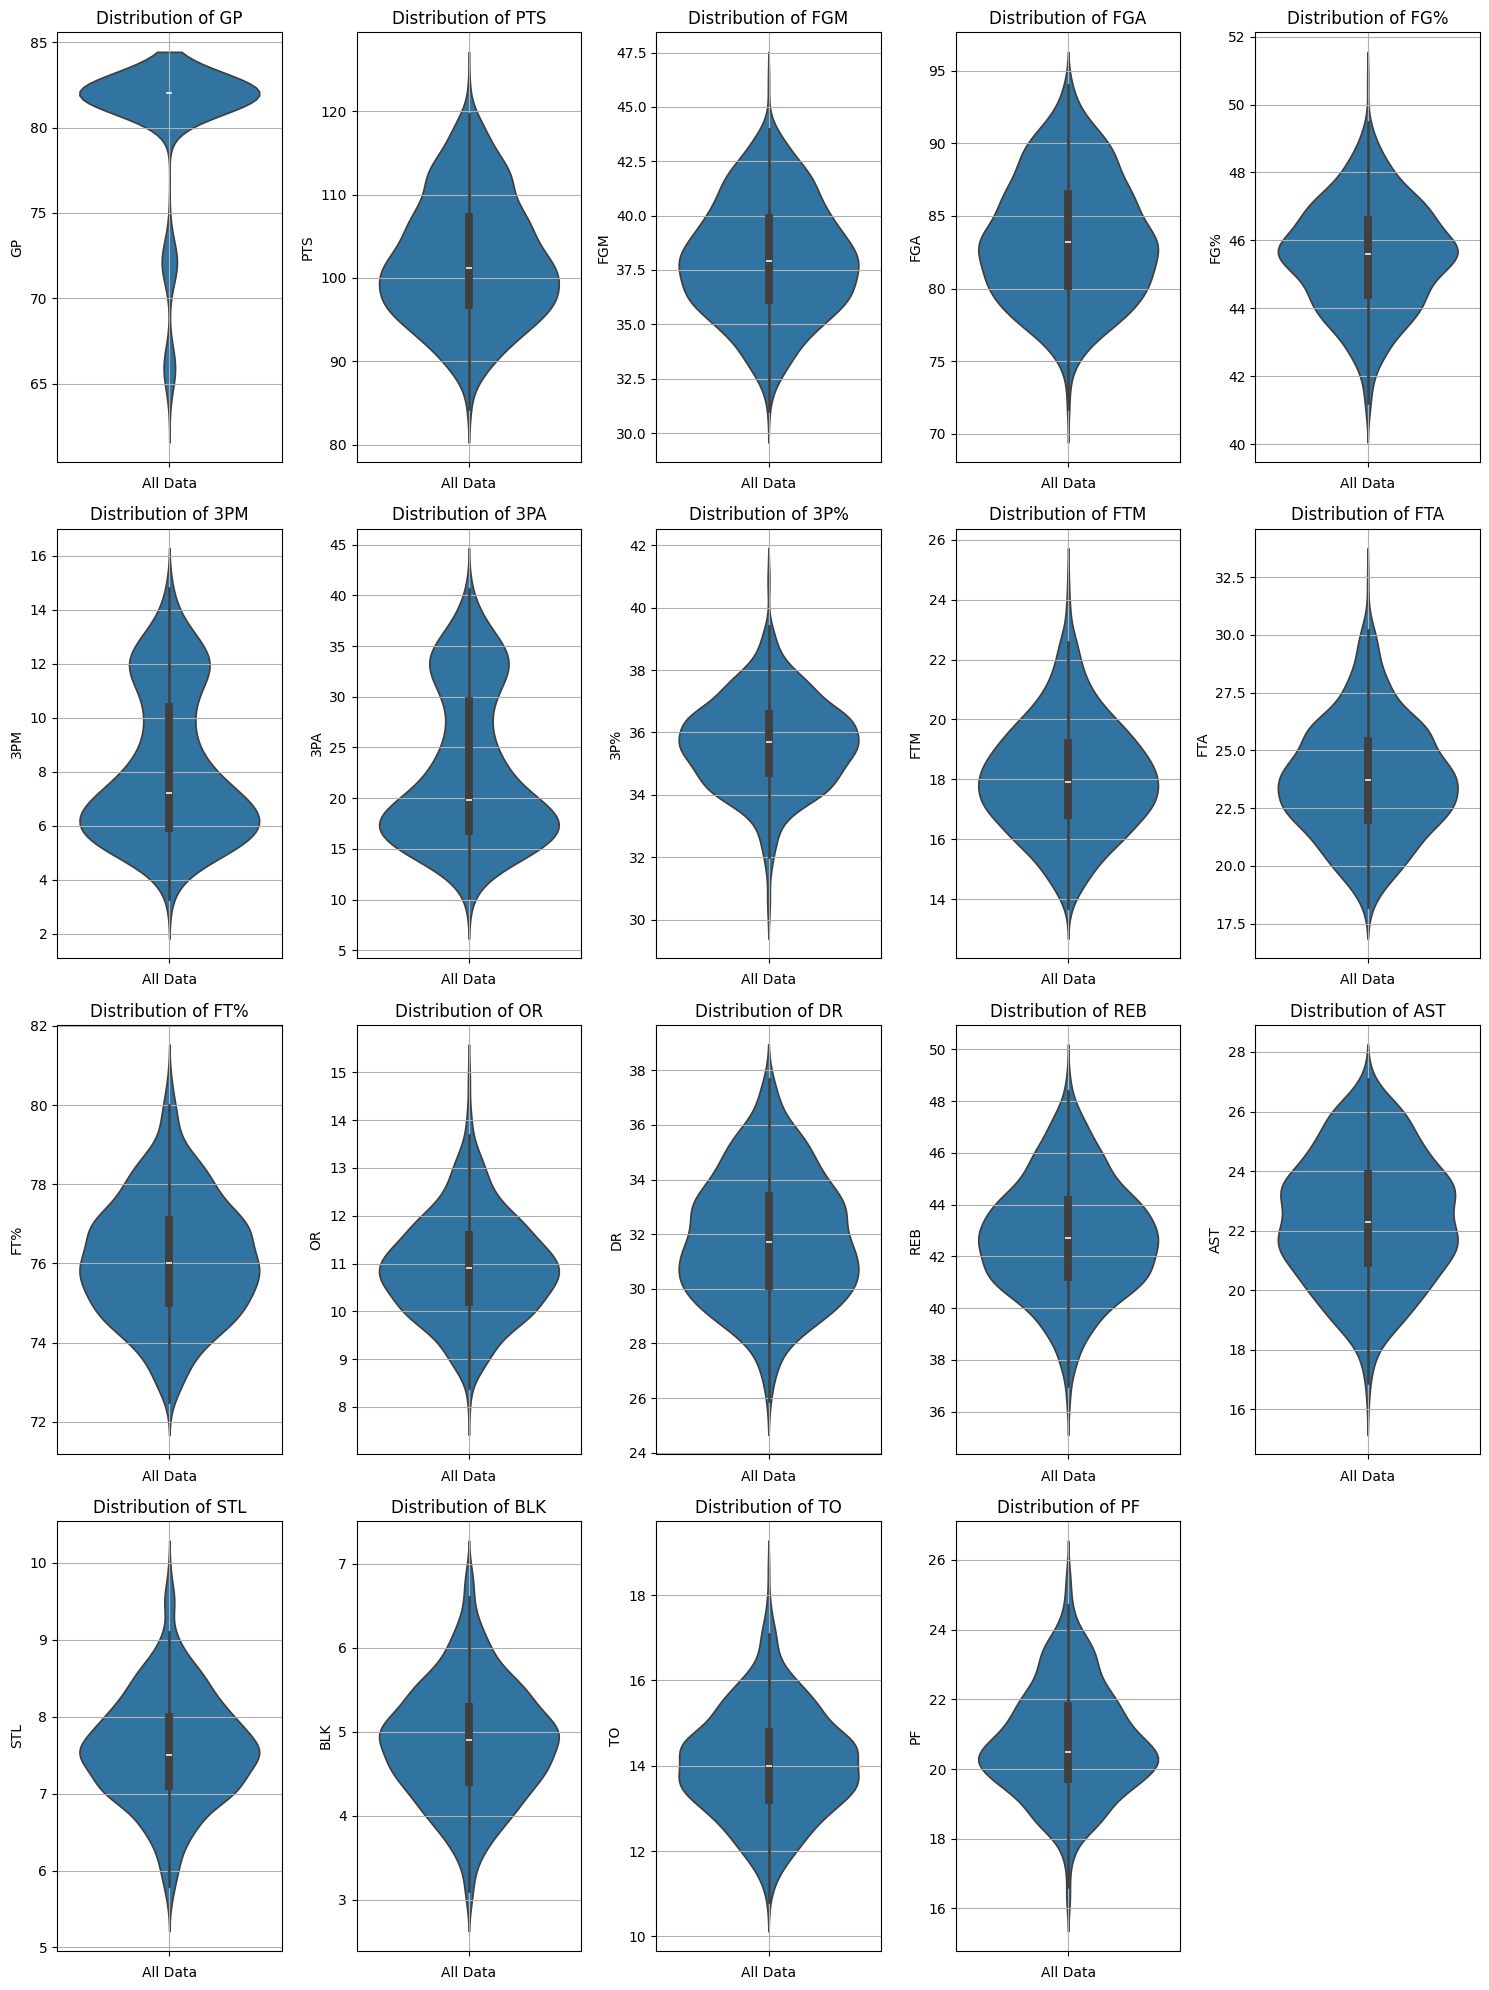

In [52]:
# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-{}.csv"

# Charger les données
df = utils.load_all_data_teams(team_stats_path)

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Filtrer les colonnes sélectionnées
df_filtered = utils.filter_selected_columns(df, selected_columns)

# Générer des violin plots pour les variables sélectionnées
utils.plot_violin_plots(df_filtered, selected_columns[1:])

### Correlation pour les  statistique adverse des équipes:

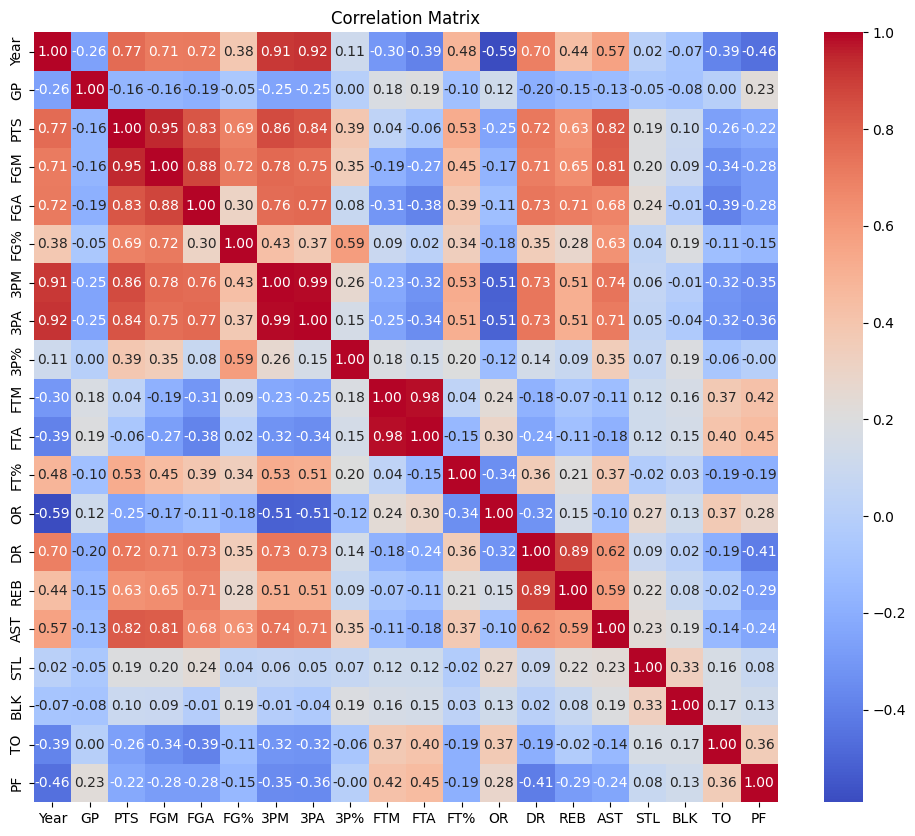

In [63]:
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-{}.csv"

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Charger les données team_stats
team_stats = utils.load_all_data_teams(team_stats_path)
team_stats = utils.filter_selected_columns(team_stats, selected_columns)
team_stats_desc = utils.descriptive_stats(team_stats)

# Visualiser les distributions et les relations entre les variables sélectionnées
#plot_distributions_and_relations(team_stats, selected_columns)

# Analyser les corrélations entre les variables sélectionnées
utils.analyze_correlations(team_stats, selected_columns)

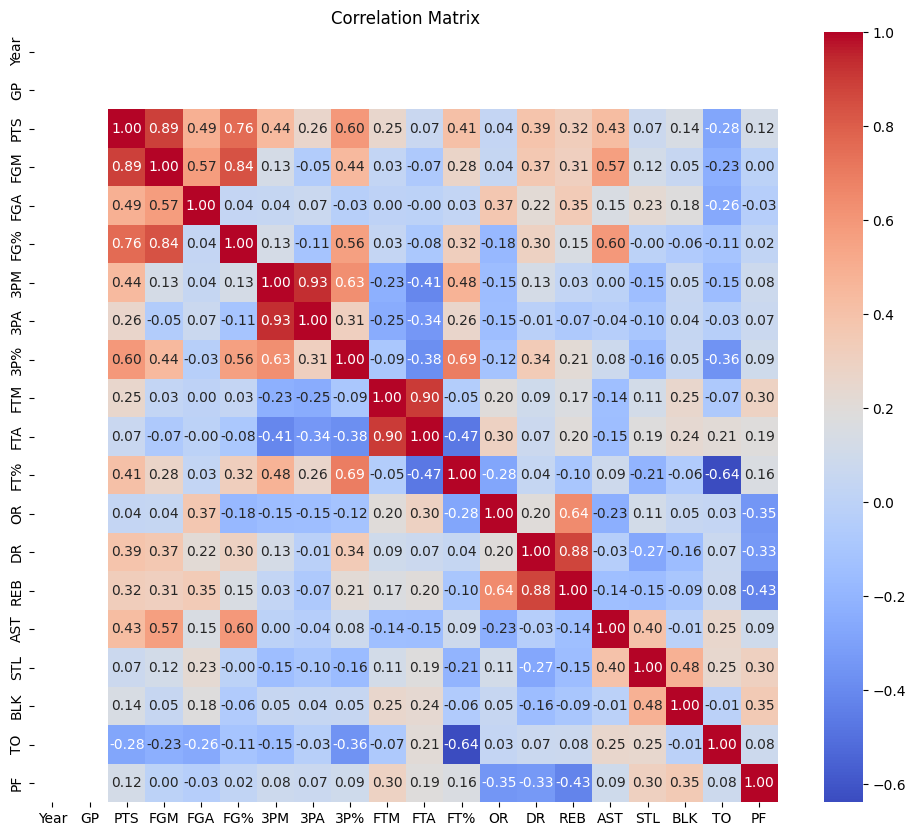

In [38]:
# Analyser les corrélations entre les variables sélectionnées
utils.analyze_correlations(team_stats[team_stats['Year'] == 2020], selected_columns)

### Evolution des équipes

###  Evolution des 3 meilleures équipes et 3 pires équipes  basé sur leur rang moyen depuis 2002  (uniquement les équipes présente dans toutes les années)

File not found: ../data/standings/NBA-Standings-Regular-Season-2001-02.csv
Top Teams Performance:


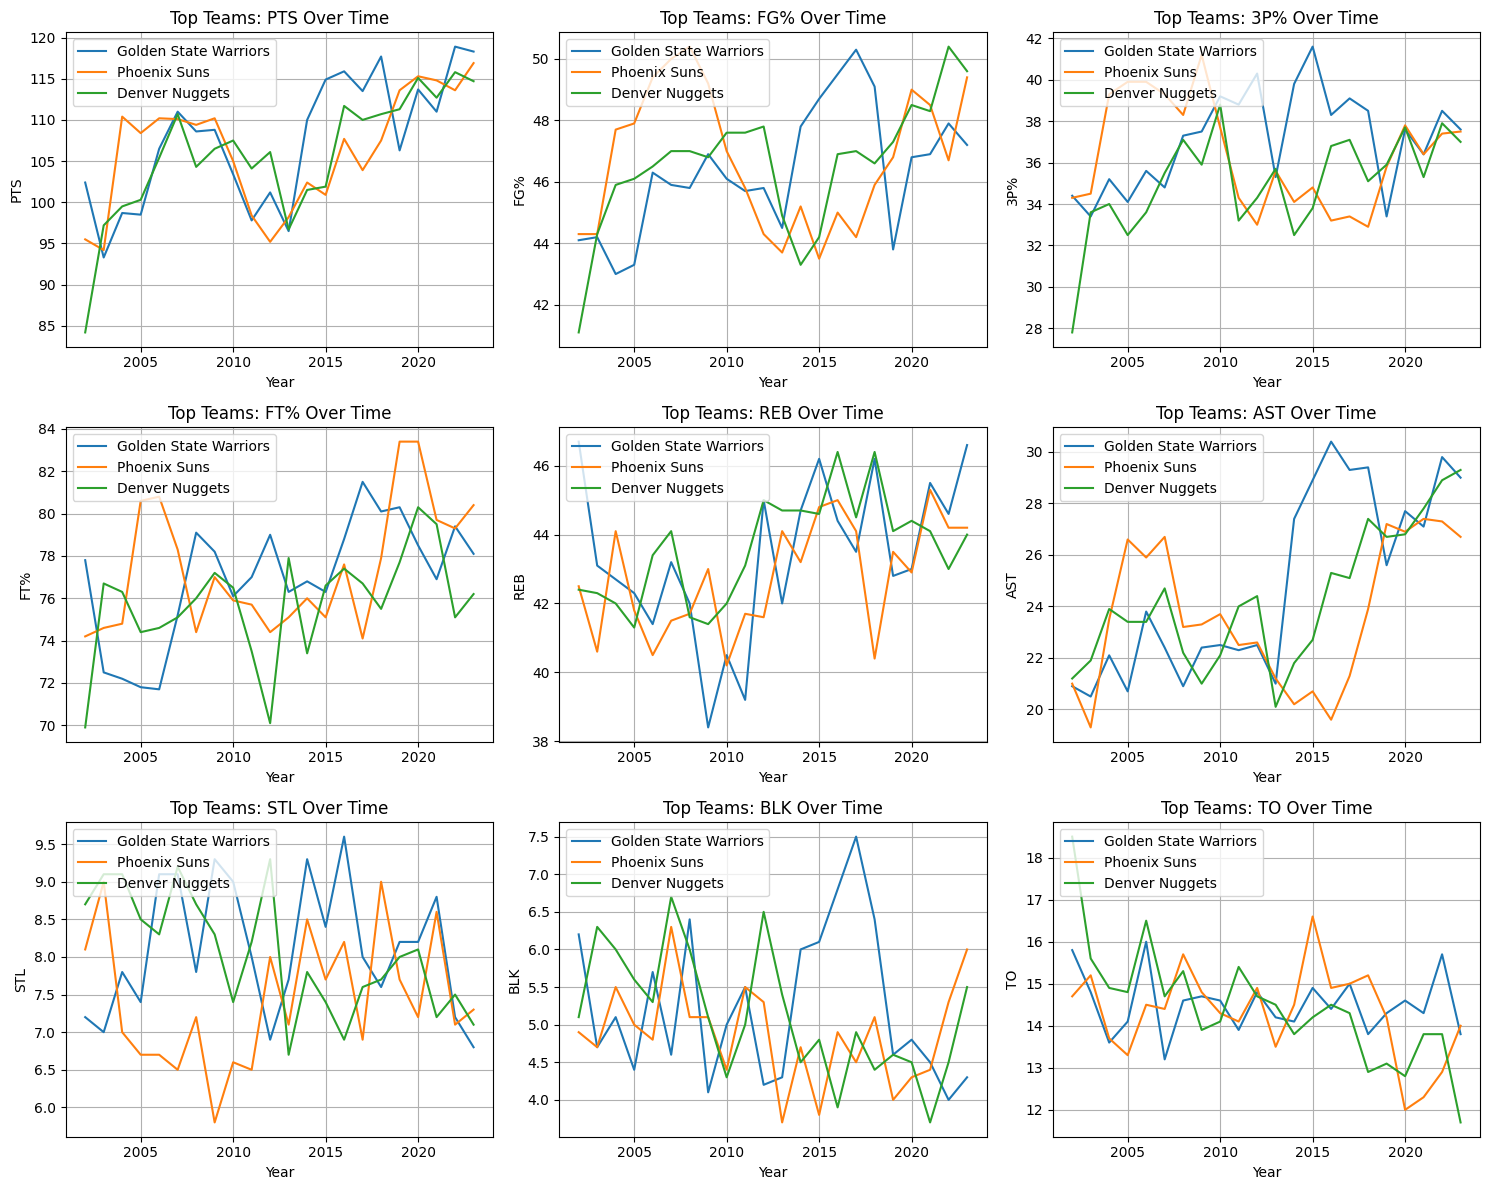

Bottom Teams Performance:


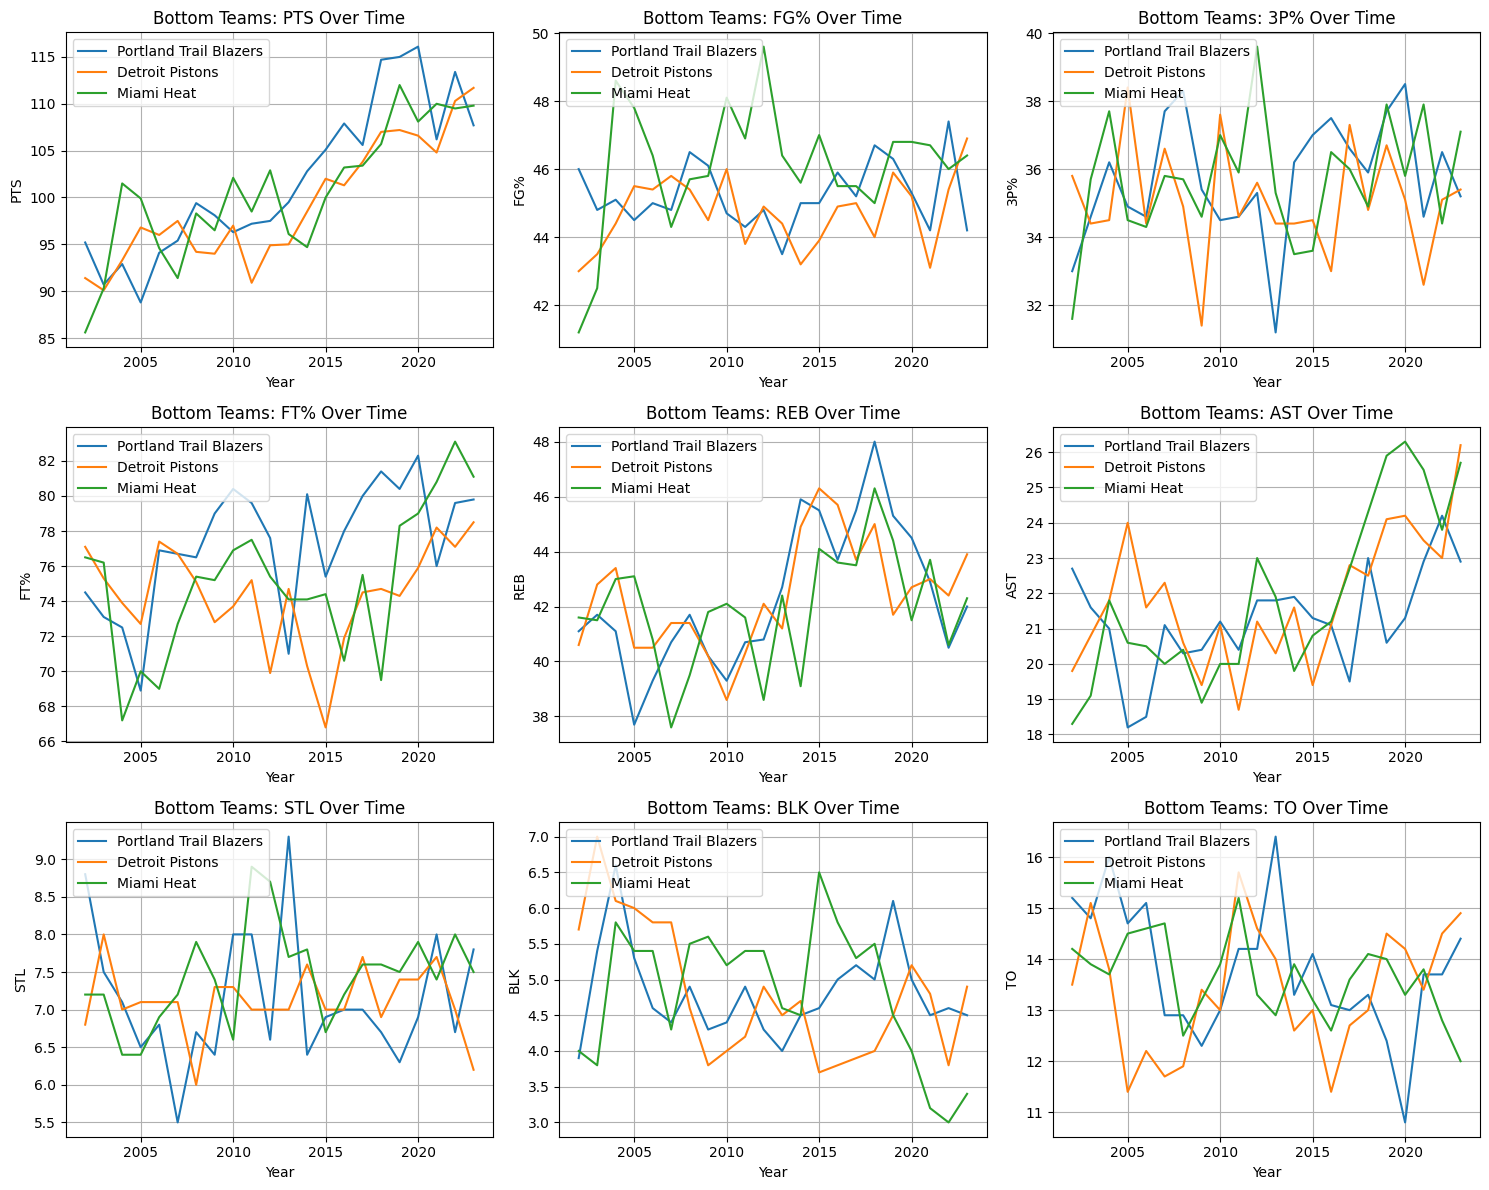

In [113]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour charger toutes les données
def load_all_data(file_path_template, start_year=2001, end_year=2023):
    all_data = []
    for year in range(start_year, end_year + 1):
        year_str = f"{year}-{str(year + 1)[-2:]}"  # Format des années ex: 2001-02
        file_path = file_path_template.format(year_str)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['Year'] = year
            all_data.append(df)
        else:
            print(f"File not found: {file_path}")
    
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

# Charger les données team_stats et standings
team_stats_path = "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv"
standings_path = "../data/standings/NBA-Standings-Regular-Season-{}.csv"

team_stats = load_all_data(team_stats_path, start_year=2001, end_year=2023)
standings = load_all_data(standings_path, start_year=2001, end_year=2023)

# Renommer les colonnes pour correspondre
team_stats = team_stats.rename(columns={'Team Name': 'Team'})
standings = standings.rename(columns={'Team Name': 'Team'})

# Joindre les deux jeux de données sur les colonnes Team et Year
combined_df = pd.merge(team_stats, standings, on=['Team', 'Year'])

# Identifier les équipes présentes chaque année
years = set(combined_df['Year'])
teams_per_year = combined_df.groupby('Year')['Team'].unique()
common_teams = set(teams_per_year.iloc[0])

for teams in teams_per_year:
    common_teams.intersection_update(teams)

# Filtrer les équipes présentes chaque année
combined_df = combined_df[combined_df['Team'].isin(common_teams)]

# Calculer la moyenne des rangs pour chaque équipe sur toutes les années
average_rank = combined_df.groupby('Team')['Rank'].mean().reset_index()
average_rank = average_rank.rename(columns={'Rank': 'Average Rank'})

# Sélectionner les équipes les plus performantes et les moins performantes
top_teams = average_rank.nsmallest(3, 'Average Rank')['Team']
bottom_teams = average_rank.nlargest(3, 'Average Rank')['Team']

# Filtrer les données combinées pour ces équipes
top_teams_df = combined_df[combined_df['Team'].isin(top_teams)]
bottom_teams_df = combined_df[combined_df['Team'].isin(bottom_teams)]

# Variables à visualiser
variables = ['PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TO']

# Fonction pour comparer les performances des équipes sélectionnées sur quelques variables clés
def compare_teams(df, group_label, variables):
    num_vars = len(variables)
    num_cols = 3  # Nombre de colonnes pour les graphes
    num_rows = (num_vars + num_cols - 1) // num_cols  # Calculer le nombre de lignes nécessaires
    
    plt.figure(figsize=(15, num_rows * 4))  # Ajuster la taille de la figure en fonction du nombre de lignes
    
    for i, var in enumerate(variables):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.lineplot(data=df, x='Year', y=var, hue='Team')
        plt.title(f"{group_label} Teams: {var} Over Time")
        plt.xlabel('Year')
        plt.ylabel(var)
        plt.legend(loc='upper left')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Comparer les performances des équipes les plus performantes et les moins performantes
print("Top Teams Performance:")
compare_teams(top_teams_df, "Top", variables)

print("Bottom Teams Performance:")
compare_teams(bottom_teams_df, "Bottom", variables)


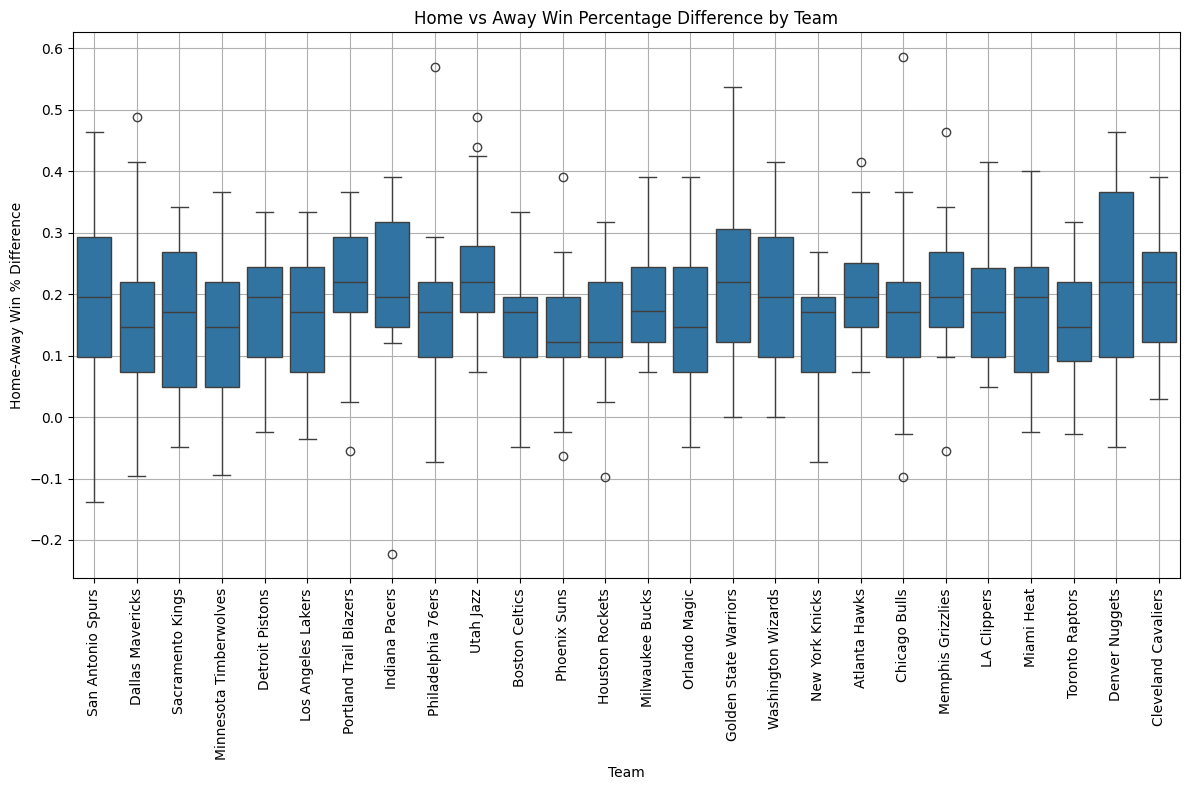

In [120]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour charger toutes les données
def load_all_data(file_path_template, start_year=2002, end_year=2022):
    all_data = []
    for year in range(start_year, end_year + 1):
        year_str = f"{year}-{str(year + 1)[-2:]}"  # Format des années ex: 2001-02
        file_path = file_path_template.format(year_str)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['Year'] = year
            all_data.append(df)
        else:
            print(f"File not found: {file_path}")
    
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

# Définir les années de début et de fin
start_year = 2002
end_year = 2022

# Charger les données standings
standings_path = "../data/standings/NBA-Standings-Regular-Season-{}.csv"
standings = load_all_data(standings_path, start_year=start_year, end_year=end_year)

# Calculer les pourcentages de victoires à domicile et à l'extérieur
standings['Home Win %'] = standings['HOME-W'] / (standings['HOME-W'] + standings['HOME-L'])
standings['Away Win %'] = standings['AWAY-W'] / (standings['AWAY-W'] + standings['AWAY-L'])

# Calculer la différence de pourcentage de victoires entre domicile et extérieur
standings['Home-Away Win % Diff'] = standings['Home Win %'] - standings['Away Win %']

# Filtrer les équipes présentes chaque année
team_counts = standings['Team Name'].value_counts()
consistent_teams = team_counts[team_counts == (end_year - start_year + 1)].index
filtered_standings = standings[standings['Team Name'].isin(consistent_teams)]

# Visualiser les différences de pourcentage de victoires
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_standings, x='Team Name', y='Home-Away Win % Diff')
plt.xticks(rotation=90)
plt.title('Home vs Away Win Percentage Difference by Team')
plt.xlabel('Team')
plt.ylabel('Home-Away Win % Difference')
plt.grid(True)
plt.tight_layout()
plt.show()
